<h1>Содержание<span class="tocSkip"></span></h1>

<div style="border:solid green 2px; padding: 20px">
    
# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны 
исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт
и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.
Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го
или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, 
определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую 
возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - выявить закономерности определяющие успешность игры.

**Описание данных** 

Данные находятся в файле: /datasets/games.csv.
О качестве данных ничего не известно. Поэтому перед установкой параметров понадобится обзор данных. 

В таблице одинадцать столбцов.
Названия колонок:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

`Примечание:` данные за 2016 год могут быть неполными.

**План работы**
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Общий вывод.

</div> 

## Изучение данных из файла
Откроем файл с данными и изучим общую информацию.


In [1]:
# импорт необходимых библиотек 

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
# чтение файла с данными и сохранение в df
# изучение общей информации о наборе данных

df = pd.read_csv('/datasets/games.csv')

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# вывод на экран названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В названиях колонок имеется нарушение стиля. Необходимо заменить названия столбцов (привести к нижнему регистру).


Для обнаружения всех неточностей в данных применим метод describe, он показывает основные статистические характеристики
данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, 
диапазон, медиану, 0.25 и 0.75 квартили.


In [4]:
# обнаружение всех неточностей в данных 
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Чтобы посмотреть статистику по нечисловым признакам (категориальным и булевым), нужно явно указать интересующие нас типы в параметре include.

In [5]:
# статистика по категориальным переменным
df.describe(include=['object', 'bool'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Проверим данные таблицы на явные дубликаты одной командой:

In [6]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

Проверим наличие пропусков в данных: 

In [7]:
# подсчёт пропусков в таблице: 
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div style="border:solid green 2px; padding: 20px">

### Вывод

Датасет `df` содержит информацию о продажах игр в разных странах за период с 1980 по 2016 год, оценки пользователей и экспертов,
жанры и платформы. В топ позиции находится игра с названием Need for Speed: Most Wanted, платформа PS2, жанр Action, рейтинг Е.
Дубликатов в данных нет. 

Обнаружены пропуски в пяти колонках: названия игр `name` 2, год выпуска `year_of_release` 269,
оценки критиков `critic_score` 8578, оценки пользователей `user_score` 6701, рейтинг от организации ESRB `rating` 6766. 

Пропуски в названиях игр могли произойти в результате сбоя выгрузки данных; год выпуска игр либо не внесли, 
либо сбой при выгрузке; критики, пользователи и организация ESRB моги не дать оценку всем играм.
Необходимо произвести замену пропусков где это возможно.

Необходимо привести названия столбцов к нижнему регистру.
    
</div> 

## Предобработка данных
### Стиль заголовков

Приведем названия столбцов в соответствие с хорошим стилем.

Для этого переименуем колонки так:
- Name → name
- Platform → platform
- Year_of_Release → year_of_release
- Genre → genre
- NA_sales → na_sales
- EU_sales → eu_sales
- JP_sales →  jp_sales
- Other_sales → other_sales
- Critic_Score → critic_score
- User_Score → user_score
- Rating  → rating


In [8]:
# переименование столбцов
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score',
 'User_Score': 'user_score', 'Rating': 'rating'})

# проверяем результат, еще раз выводим на экран названия столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Замена типа данных

#### Замена типа данных в колонке `year_of_release`
В столбце 'year_of_release' записан год выпуска игры не ввиде даты, 
а в виде числа (значение года). Сейчас значения в столбце 'year_of_release' — это тип данных float64(вещественные числа),
произведем замену на целые числа типа int64. Для этого воспользуемся аргументом ('int') метода astype(), кторый означает,
что значение нужно перевести в целое число.

In [9]:
# замена типа данных в year_of_release
df['year_of_release']=round(df['year_of_release'], 0).astype('Int64')


#### Замена типа данных в колонке `user_score`

Cтолбец 'user_score' распознан как строки — тип object.
Это значит, что в столбце есть нечисловые значения или пропуски, а они помешают нашим расчётам. 

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.
Аббревиатура tbd обозначает to be determined - будет определено, то есть это тоже можно воспринимать как пропуск. 
Сразу преобразовать строки в тип данных int(целые числа) не получится, сначала проведем преобразование в числовой тип данных 
float64(вещественные числа). Для этого есть стандартный метод Pandas — to_numeric(). У метода to_numeric() есть параметр errors.
От значений, принимаемых errors, зависят
действия to_numeric при встрече с некорректным значением. Будем использовать параметр `errors='coerce' — некорректные 
значения принудительно заменяются на NaN.
 

In [10]:
# приведем колонку user_score к типу данных float64  

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  

# проверим замену типа данных
df.info() 

# выведем таблицу на экран
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропуски значений

Обнаружены пропуски в пяти колонках:
- `name` - названия игр 2,
- `year_of_release` - год выпуска 269,
- `critic_score` - оценки критиков  8578,
- `user_score` - оценки пользователей 6701,
- `rating` - рейтинг от организации ESRB 6766

Нет подходящих значений для замены пропусков в колонке с названием игр, так как их всего два, то удалим эти пропуски без 
потери качества данных.

Также есть 269 пропусков в клонке год выпуска - это менее 1.6% от объема даннных. Подходящих значений для замены пропусков нет.
Удалим эти пропуски методом dropna() и восстановим индексы методом reset_index() c параметром drop, равным True. 


In [11]:
# удаление пропусков в name и year_of_release
df = df.dropna(subset=['name', 'year_of_release']).reset_index(drop=True) 

В колонке оценки критиков пропущенные значения можно заменить на среднее, медиану или нулевое значение. 
Для начала проанализируем данные в колонке `critic_score` методом describe().

In [12]:
# анализ данных в колонке critic_score 
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [13]:
# сгруппируем данные critic_score по жанру и году выпуска игр
df.groupby(['year_of_release', 'genre'])['critic_score'].mean().head(15)

year_of_release  genre     
1980             Action       NaN
                 Fighting     NaN
                 Misc         NaN
                 Shooter      NaN
                 Sports       NaN
1981             Action       NaN
                 Platform     NaN
                 Puzzle       NaN
                 Racing       NaN
                 Shooter      NaN
                 Simulation   NaN
                 Sports       NaN
1982             Action       NaN
                 Misc         NaN
                 Platform     NaN
Name: critic_score, dtype: float64

Анализ показал, что данные об играх предоставлены за период с 1980 по 2016 год. Однако оценки критиков начинают 
формироваться только с 1996-1997 года, до этого периода стоят пропущеные значения NaN. Очевидно, что в период с 1980 по 1996
год компьютерные игры не имели массового распространения, оценки критиков либо не учитывали, либо их не существовало. 
Поэтому заменять пропуски на среднее, медианное или нулевое значение в данном случае будет не корректно. Оставим их пустыми.

Проанализируем также данные в колонке `user_score` методом describe().

In [14]:
# анализ данных в колонке critic_score 
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [15]:
# сгруппируем данные по жанру и году выпуска игр
df.groupby(['year_of_release', 'genre'])['user_score'].mean().head(15)

year_of_release  genre     
1980             Action       NaN
                 Fighting     NaN
                 Misc         NaN
                 Shooter      NaN
                 Sports       NaN
1981             Action       NaN
                 Platform     NaN
                 Puzzle       NaN
                 Racing       NaN
                 Shooter      NaN
                 Simulation   NaN
                 Sports       NaN
1982             Action       NaN
                 Misc         NaN
                 Platform     NaN
Name: user_score, dtype: float64

Аналогичная ситуация и с оценками пользователей, информация появляется только с 1996-1997 года, до этого периода стоят 
пропущеные значения NaN - это может означать, что до этого периода оценок пользователей не существовало.
Другая ситуация с аббревиатурой 'tbd' в столбце с оценкой пользователей. Аббревиатура tbd обозначает to be determined - 
будет определено, то есть на момент выгрузки данных оценки пользователей по по этим строкам еще не сформированы. 
Поэтому заменять эти пропуски на среднее, медианное или нулевое значение в данном случае будет не корректно. 
Оставим их пустыми.

Проанализируем также данные в колонке rating методом describe().

In [16]:
# анализ данных в колонке rating 
df['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [17]:
# отфильтруем пропущенные значения
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
# сгруппируем данные по жанру и году выпуска игр
df.groupby(['year_of_release', 'genre'])['rating'].count().head(150)

year_of_release  genre    
1980             Action       0
                 Fighting     0
                 Misc         0
                 Shooter      0
                 Sports       0
                             ..
1996             Sports       0
                 Strategy     0
1997             Action       2
                 Adventure    1
                 Fighting     1
Name: rating, Length: 150, dtype: int64

Аналогичная ситуация и с рейтингом от организации ESRB, информация появляется только с 1997 года, до этого периода стоят 
пропущеные значения NaN - это может означать, что до этого периода рейтинга не существовало. Поэтому заменять эти пропуски 
на среднее, медианное или нулевое значение в данном случае будет не корректно. Заполним пропуски строкой 'unknown'.

In [19]:
# замена пропущенных значений
df['rating'] = df['rating'].fillna('unknown')

# проверка заполнения пропущенных значений
df['rating'].isna().sum()

0

### Категоризация данных
В колонке rating содержаться значения рейтинга от организации ESRB (Entertainment Software Rating Board) — это ассоциация, 
определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную 
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [20]:
# выведем уникальные значения rating
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [21]:
# посмотрим на распределение данных по рейтингу
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

Основными рейтингами являются E, T, M, E10+. Практически не встречаются EC, K-A, AO, RP.


In [22]:
# распределим значения рейтинга по понятным категориям, напишем функцию

def rating_group_df(text):
    
    if 'M' in text:
        return 'Для взрослых'
    
    if 'T' in text:
        return 'Для подростков'
    
    if 'E10+' in text:
        return 'Для детей'
        
    if 'E' in text:
        return 'Для всех'
    
    return 'Рейтинг ожидается' 
    
# добавим в таблицу df новый стоблец с данными о категорицации рейтинга
df['rating_group'] = df['rating'].apply(rating_group_df)       

# отсортируем данные по рейтингу
df['rating_group'].value_counts()   
    

Рейтинг ожидается    6681
Для всех             3929
Для подростков       2905
Для взрослых         1536
Для детей            1393
Name: rating_group, dtype: int64

### Посчитаем суммарные продажи во всех регионах

In [23]:
# создаем новый столбец и посчитаем сумарные продажи во всех регионах

list_name = ['na_sales','eu_sales','jp_sales', 'other_sales']        
df['total_sales']=df.loc[:, list_name].sum(axis=1)
    
# выведем таблицу на экран, проверим добавление столбца
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,Рейтинг ожидается,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,Рейтинг ожидается,31.38


## Исследовательский анализ данных

### Количество игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы.
Важны ли данные за все периоды?

In [24]:
# сгруппируем данные по году выпуска и названию игр
df.groupby(['year_of_release'])['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Меньше всего игр выпускалось в период с 1980 по 1993 год, затем наблюдается постепенный рост, наибольшее 
количество игр выпускалось в период с 2006 по 2011 год, затем наблюдается спад.

In [25]:
# анализ количества игр по годам
df.pivot_table(columns='year_of_release', values='name', aggfunc='count').T.describe()

,name
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


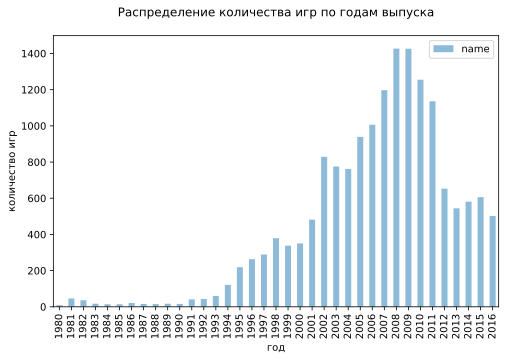

In [26]:
# построим столбчатую диаграмма распределения количества игр по годам выпуска
(df
 .pivot_table(columns='year_of_release', values='name', aggfunc='count')
 .T
 .plot(kind='bar', alpha=.5)
)
plt.title('Распределение количества игр по годам выпуска'+ "\n")
plt.xlabel('год')
plt.ylabel('количество игр')

plt.show()

Пик выпуска компьтерных игр пришелся на 2008 и 2009 год. Распределение количества игр по годам выпуска приближено
к нормальному распределению с отрицательной скошенностью. Данные за период с 1980 по 1993 год не актуальны для нашего
исследования, тк в этот период наблюдается небольшой рост выпуска игр. Данные за период с 1994 по 2011 года не важны 
для нашего исследования, тк в этот период наблюдается интенсивный рост и спад количества выпуска игр.

### Продажи по платформам
- Посмотрим, как менялись продажи по платформам. 
- Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?

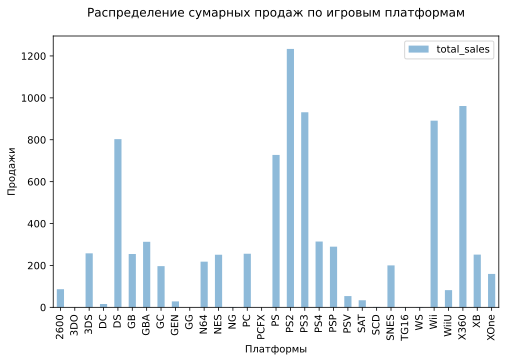

In [27]:
# построим столбчатую диаграмму распределения продаж по игровым платформам
(df
 .pivot_table(columns='platform', values='total_sales', aggfunc='sum')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение сумарных продаж по игровым платформам'+ "\n")
plt.xlabel('Платформы')
plt.ylabel('Продажи')

plt.show()


С наибольшими продажами платформы: PS2, DS, PS3, Wii, X360. Лидируют платформы PS2 и X360.      

In [28]:
# выберем платформы с наибольшими суммарными продажами
top_platform = df.query('platform in ["PS2", "DS", "PS3", "Wii", "X360"]').fillna(0)

top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех,28.91


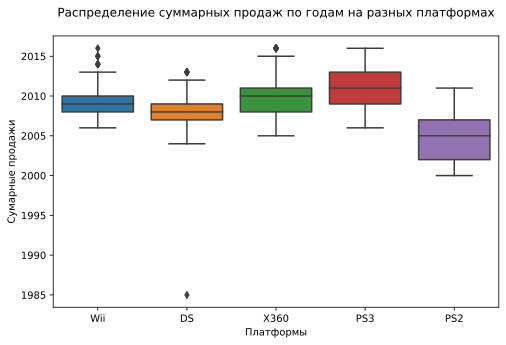

In [29]:
# выберем платформы с наибольшими суммарными продажами и построим распределение по годам

data_platform = top_platform.loc[: , ['platform', 'year_of_release', 'total_sales']]

data_platform.groupby(['platform'])['year_of_release'].count()
sns.boxplot(data=data_platform, x='platform', y='year_of_release')

plt.title('Распределение суммарных продаж по годам на разных платформах'+ "\n")
plt.xlabel('Платформы')
plt.ylabel('Сумарные продажи')

plt.show()

Определим жизненный срок платформы на примере PS (PS 1988 → PS2 2005 → PS3 2011 → PS4 2015).
Для стремительно развивающейся игровой индустрии жизненный срок платформы с каждым разом сокращается: 
платформа PS просуществовала 7 лет, PS2 6 лет, PS3 4 года. В данном случае период 4-2 года будет наиболее 
актуальным для дальнейших прогнозов.

### Актуальный период 
Актуальный период определим самостоятельно в результате исследования предыдущих вопросов.
Основной фактор — эти данные помогут построить прогноз на 2017 год. Определим актуальный период за два предпоследних 
года: 2014 и 2015 год. Не учитываем в работе данные за предыдущие годы. Данные за 2016 год тоже не учитываем,
тк по условию данные за 2016 год могут быть неполными.

Определим какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.

In [30]:
# выделяем актуальный период
actual_year = df.query('year_of_release >= 2014 and year_of_release != 2016')
actual_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,Рейтинг ожидается,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Для взрослых,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,Рейтинг ожидается,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,Для всех,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,Рейтинг ожидается,7.98


### Лидирующие платформы

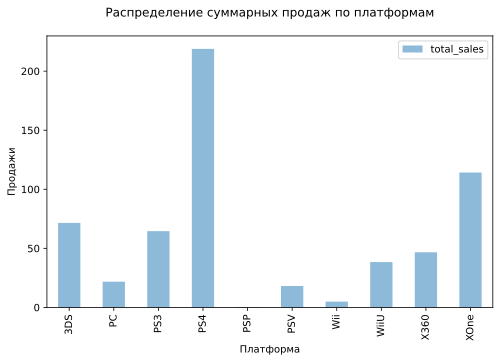

In [31]:
# определим какие платформы лидируют по продажам в актуальный период
# построим столбчатую диаграмму распределения суммарных продаж по платформам
(
     actual_year
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', alpha=0.5)
)

plt.title('Распределение суммарных продаж по платформам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.show()

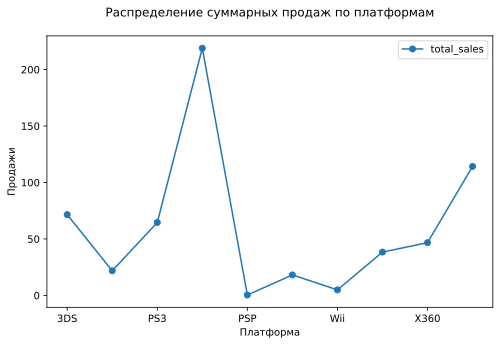

In [32]:
# более детально посморим на расспределение продаж по платформам
(
     actual_year
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .reset_index()
    .plot(x='platform', y='total_sales', style='o-')
)
plt.title('Распределение суммарных продаж по платформам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.show()

In [33]:
# отсортируем таблицу в порядке убывания, определим лидирующими платформы
(
    actual_year
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head()
)

,platform,total_sales
3,PS4,218.90
9,XOne,114.21
0,3DS,71.54
2,PS3,64.58
8,X360,46.70


К потенциально прибыльным платформам за актуальный период можно отнести: PS4, XOne. При этом PS3 и X360 падют в продажах
постепенно уступая место новым поколениям PS4, XOne.

In [34]:
# отсортируем несколько лидирующих платформ в отдельную таблицу
top_actual_pl = actual_year.query('platform in ["PS4", "XOne"]')

top_actual_pl.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,Рейтинг ожидается,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Для взрослых,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,Для всех,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,Рейтинг ожидается,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,Для взрослых,7.66


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [35]:
# отсортируем игры по платформам
(    actual_year
    .pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head(15)
 
)

,platform,name,total_sales
465,PS4,Call of Duty: Black Ops 3,14.63
515,PS4,Grand Theft Auto V,12.62
109,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
498,PS4,FIFA 16,8.58
603,PS4,Star Wars Battlefront (2015),7.98
464,PS4,Call of Duty: Advanced Warfare,7.66
139,3DS,Super Smash Bros. for Wii U and 3DS,7.55
1059,XOne,Call of Duty: Black Ops 3,7.39
500,PS4,Fallout 4,7.17
919,WiiU,Mario Kart 8,7.09


Глобальными по продажам играми на лидирующих платформах являются Call of Duty: Black Ops 3 и Grand Theft Auto V.

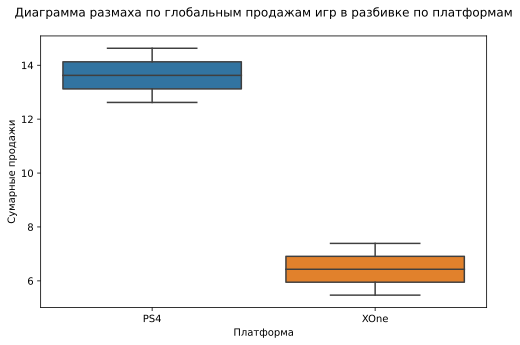

In [36]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
global_name = top_actual_pl.query('name in ["Call of Duty: Black Ops 3", "Grand Theft Auto V"]')

top_global_name = global_name.loc[: , ['platform', 'name', 'total_sales']]

top_global_name.groupby(['platform'])['name'].count()
sns.boxplot(data=top_global_name, x='platform', y='total_sales')

plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Сумарные продажи')

plt.show()

Суммарные продажи лидирующих компьтерных игр на платформе PS4 в два раза больше чем на платформе XOne. 

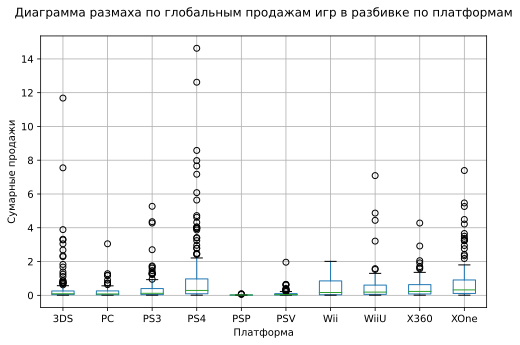

In [37]:
# построим график глобальных продаж по всем играм для топ 8 платформ
(actual_year
 .pivot_table(index='platform', columns='name', values='total_sales', aggfunc='sum')
 .T
 .boxplot()
)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Сумарные продажи')

plt.show()

In [38]:
# получим числовые характеристики
actual_year['total_sales'].describe()

count    1187.000000
mean        0.505063
std         1.167734
min         0.010000
25%         0.040000
50%         0.120000
75%         0.440000
max        14.630000
Name: total_sales, dtype: float64

In [39]:
# удалим редкие и выбивающиеся значения из total_sales
actual_year = actual_year.query('total_sales <= 1.2').reset_index(drop=True)
len(actual_year)

1061

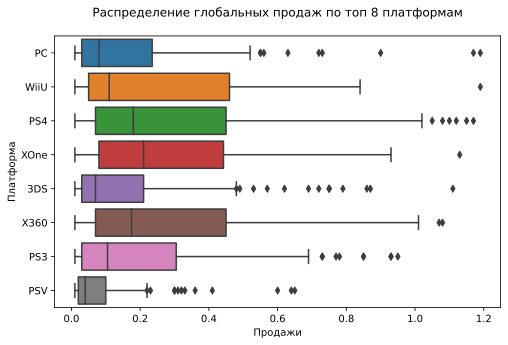

In [40]:
# построим графики глобальных продаж по всем играм для топ 8 платформ с ограничением по высоте
top_platforms = actual_year.platform.value_counts().sort_values(ascending = False).head(8).index.values
sns.boxplot(y="platform", x="total_sales", data=actual_year[actual_year.platform.isin(top_platforms)], orient="h")

plt.title('Распределение глобальных продаж по топ 8 платформам'+ "\n")
plt.xlabel('Продажи')
plt.ylabel('Платформа')

plt.show()

### Отзывы пользователей и критиков
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [41]:
# выделим популярную платформу в отдельную таблицу
ps4 = df.query('platform == "PS4"')
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,Рейтинг ожидается,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Для взрослых,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,Для всех,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,Рейтинг ожидается,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,Для взрослых,7.66


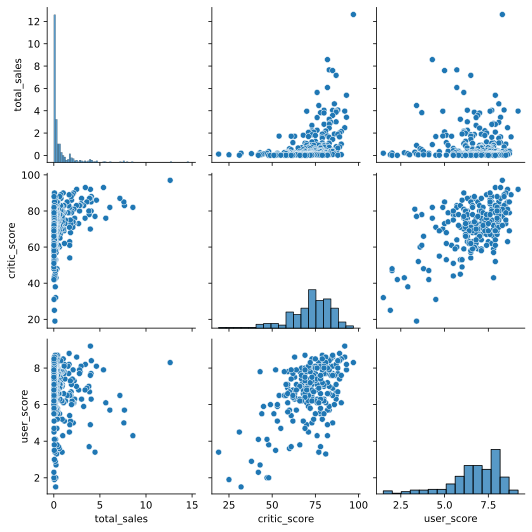

In [42]:
# построим матрицу рассеяния 
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(ps4[cols])
sns_plot.savefig('pairplot.png')

Чтобы найти связь между продажами и оценками критиков, их нужно отметить на одном графике, а не на отдельных гистограммах.
Зададим площадь и стоимость одного квадратного метра на осях X и Y соответственно. Это возможно на особом типе графиков —
scatter (пер. «разброс, рассеивание»). Передадим значение scatter параметру kind метода plot():

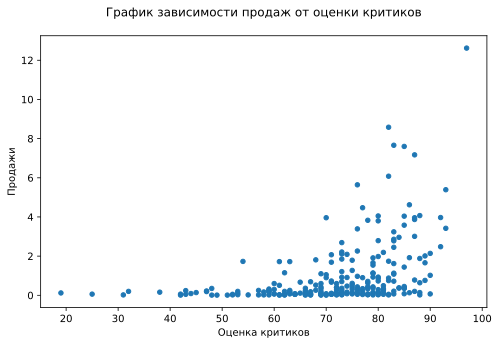

In [43]:
# построим график зависимости прдаж от оценки критиков
ps4.plot(x='critic_score', y='total_sales', kind='scatter')

plt.title('График зависимости продаж от оценки критиков'+ "\n")
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')

plt.show()

На графике можно увидеть взаимосвязь между двумя величинами. А также понять, какие данные типичны, а какие — аномальны. 
Есть основная масса точек с наиболее частыми сочетаниями оценки критиков и продаж. Чем выше оценки критиков тем больше продажи. 

Изучим совместное распределение величин. Взаимосвязь двух или нескольких величин называется «корреляция». 
График (да и жизненный опыт) позволяет утверждать, что оценки критиков и продажи взаимосвязаны, или коррелируют. 
Оценим численно, насколько тесна взаимосвязь. Для этого находят коэффициент корреляции Пирсона. 
Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1.
- Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.
- Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.
- Если рост одной величины связан с уменьшением другой, коэффициент отрицательный.

In [44]:
# найдем коэффициент корреляции Пирсона
ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178095

Корреляция в 0.40 говорит о наличии связи, но не сильной. Выходит, повышение оценки критиков сопровождается прибавкой 
в продажах, но не всегда. Обратное же утверждение не имеет смысла, т.к. при увеличении продаж оценки критиков не увеличатся.

In [45]:
# посмотрим на числовые характеристики зависимости продаж от оценки критиков
ps4.pivot_table(index='critic_score', values='total_sales').describe()

,total_sales
count,54.000000
mean,1.008892
std,1.870243
min,0.010000
25%,0.136786
50%,0.431000
75%,1.186474
max,12.620000


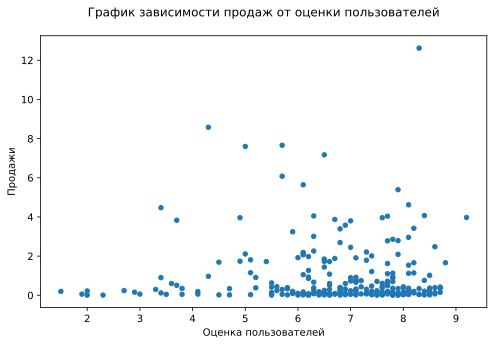

-0.031957110204556376

In [46]:
# построим график зависимости прдаж от оценки пользователей
ps4.plot(x='user_score', y='total_sales', kind='scatter')

plt.title('График зависимости продаж от оценки пользователей'+ "\n")
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')

plt.show()

# найдем коэффициент корреляции Пирсона
ps4['user_score'].corr(ps4['total_sales'])

Корреляция в -0.03 отрицательная, но больше приближена к нулю, что говорит об отсутсвтии зависимости. 
На графике все же определяется увеличение плотности продаж при оценках пользователей выше 5. Бывает, 
что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер.
Потому-то коэффициент корреляции такую связь не берёт.

In [47]:
# посмотрим на коэффициент корреляции Пирсона во взаимосвязи с другими данными
display(ps4.corr()) 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Получается, что на рост продаж больше влияют оценки критиков, а не пользователей. В тоже время корреляция зависимости
оценки пользователей от оценки критиков 0.55, зависимость есть, но не сильная и не во всех случаях высокая оценка
критиков может повлиять на оценку пользователей.

### Соотнесем выводы с продажами игр на других платформах

Посмотрим как влияют отзывы критиков и пользователей на продажи платформы XOne.

0.4169983280084017

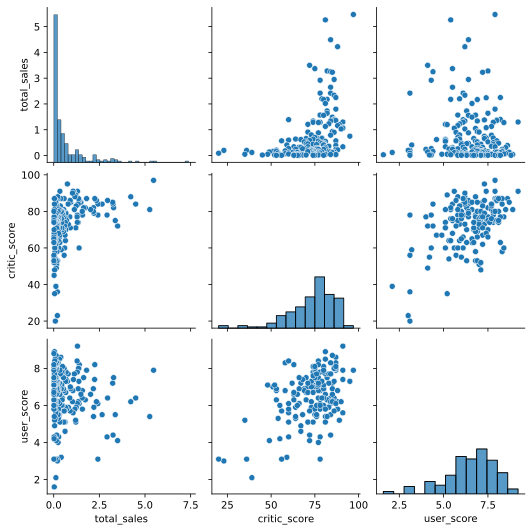

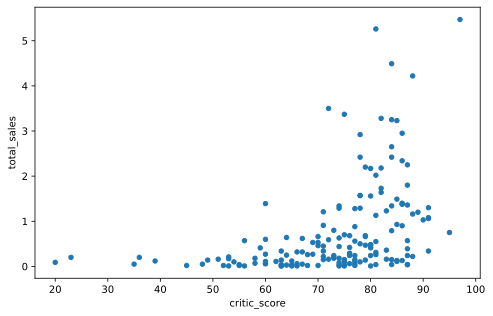

In [48]:
# выделим популярную платформу в отдельную таблицу
XOne = df.query('platform == "XOne"')

# построим матрицу рассеяния 
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(XOne[cols])
sns_plot.savefig('pairplot.png')

# построим график зависимости прдаж от оценки критиков
XOne.plot(x='critic_score', y='total_sales', kind='scatter')

# найдем коэффициент корреляции Пирсона
XOne['critic_score'].corr(XOne['total_sales'])

Корреляция в 0.41 означает слабую зависимость продаж от оценок критиков и не отличается от корреляции на платформе PS4.

-0.06892505328279414

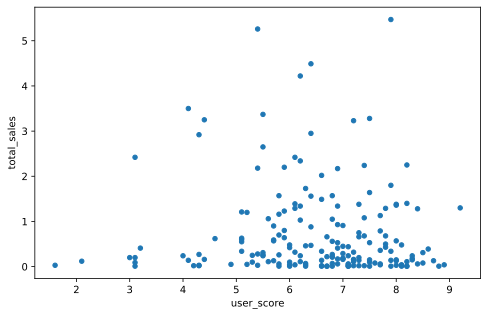

In [49]:
# построим график зависимости прдаж от оценки пользователей
XOne.plot(x='user_score', y='total_sales', kind='scatter')

# найдем коэффициент корреляции Пирсона
XOne['user_score'].corr(XOne['total_sales'])

Корреляция в -0.06 отрицательная, но больше приближена к нулю, что говорит об отсутсвтии зависимости.
Получается, что распределение зависимости продаж от оценок критиков и пользователей по глобальным 
играм на лидирующих платформах одинаковое.

### Распределение игр по жанрам
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?
Выделяются ли жанры с высокими и низкими продажами?

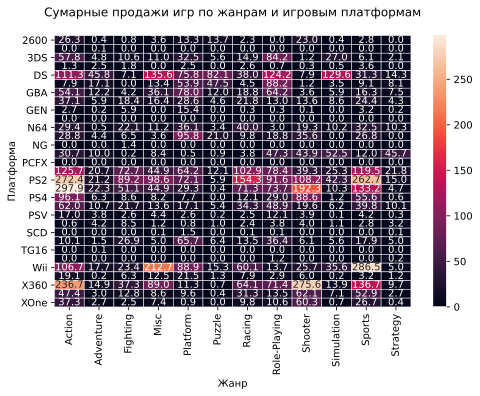

In [50]:
# визуализируем суммарные продажи игр по жанрам и игровым платформам
platform_genre_sales = df.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

plt.title('Сумарные продажи игр по жанрам и игровым платформам'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Платформа')

plt.show()


In [51]:
# построим таблицу распределения игр по жанрам и платформам
(    df
    .pivot_table(index=['platform', 'genre'], values='total_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head(15)
 
)

,platform,genre,total_sales
153,PS3,Action,297.87
244,Wii,Sports,286.49
266,X360,Shooter,275.62
141,PS2,Action,272.38
151,PS2,Sports,262.67
258,X360,Action,236.71
237,Wii,Misc,212.67
161,PS3,Shooter,192.29
147,PS2,Racing,154.33
268,X360,Sports,136.69


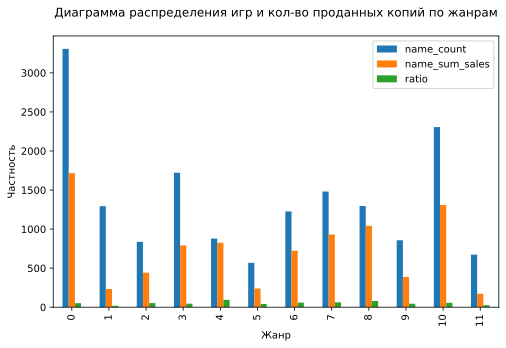

In [52]:
# построим таблицу распределения игр по жанрам
# посчитаем по каждому жанру отношение выпушенных игр и количества проданных копий
genre_name_df = df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean']).reset_index()
genre_name_df.columns = ['genre', 'name_count', 'name_sum_sales', 'ratio']
genre_name_df['ratio'] = (genre_name_df['ratio'] * 100).round(0)

# построим диаграмму распределения выпушенных игр и количества проданных копий по жанрам
genre_name_df.plot(kind='bar')
genre_name_df.head(15)

plt.title('Диаграмма распределения игр и кол-во проданных копий по жанрам'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Частность')

plt.show()

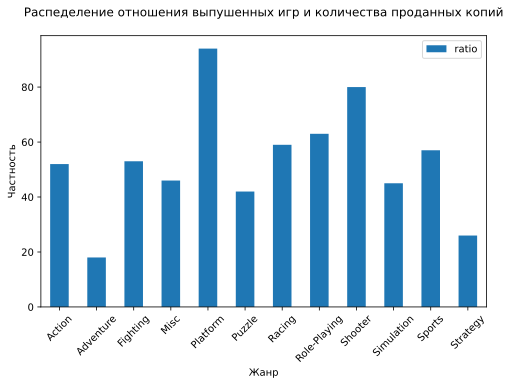

In [53]:
# построим столбчатую диаграмму распределения отношения выпушенных игр и количества проданных копий
(    genre_name_df
    .pivot_table(columns='genre', values='ratio', aggfunc='mean')
    .T
    .plot(kind='bar', rot=45)
 
)

plt.title('Распеделение отношения выпушенных игр и количества проданных копий'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Частность')

plt.show()

Лидирующими жанрами по количеству выпущенных игр являются Action, Sports, Misc, Role-Playing, Shooter, Adventure, Racing.
Лидирующими жанрами по количеству проданных копий являются Action, Sports, Shooter, Role-Playing, Platform, Misc, Racing	  
Самыми прибыльными жанрами по отношению выпушенных игр и проданных копий являются Platform, Shooter, Role-Playing, Racing, Sports.
Выделяются жанры и с низкими продажами: Adventure, Strategy, Puzzle.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишим различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

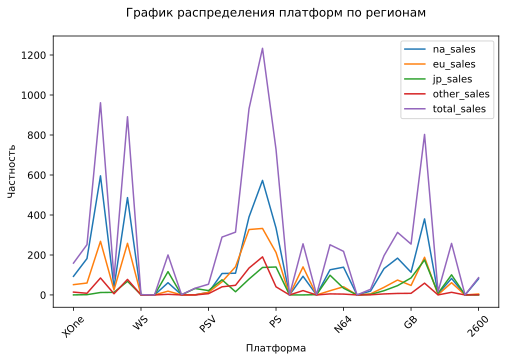

In [54]:
# построим график распределения платформ по регионам 
sales_df = df[[x for x in df.columns if 'sales' in x] + ['platform']]
sales_df.groupby('platform').sum().sort_values(by='platform', ascending=False).plot(rot=45)

plt.title('График распределения платформ по регионам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Частность')

plt.show()

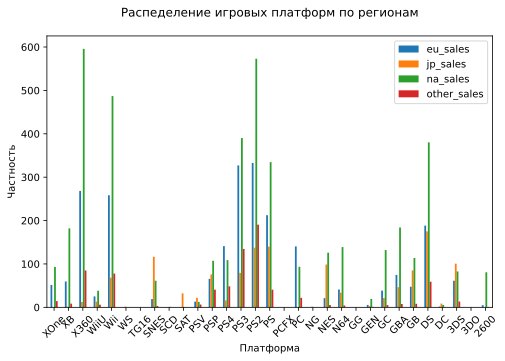

In [55]:
# построим столбчатую диаграмму распределения платформах по регионам
cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

(
     df
    .pivot_table(cols, ['platform'], aggfunc='sum')
    .sort_values(by='platform', ascending=False)
    .plot(kind='bar', rot=45)
)
plt.title('Распеделение игровых платформ по регионам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Частность')

plt.show()

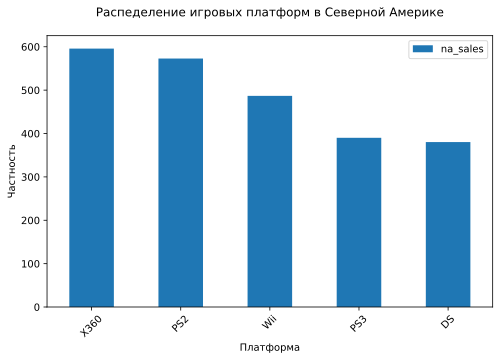

In [56]:
# посмотрим cамые популярные платформы (топ-5) для na_sales
(   df
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(kind='bar', rot=45)
)

plt.title('Распеделение игровых платформ в Северной Америке'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Частность')

plt.show()

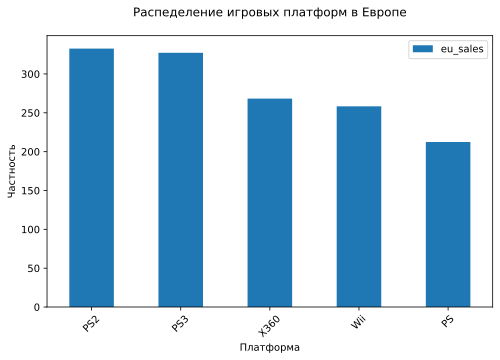

In [57]:
# посмотрим cамые популярные платформы (топ-5) для eu_sales
(   df
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(kind='bar', rot=45)
)

plt.title('Распеделение игровых платформ в Европе'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Частность')

plt.show()


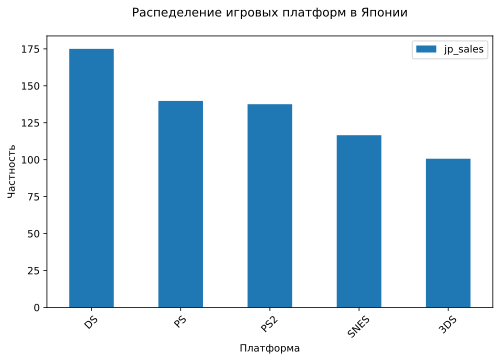

In [58]:
# посмотрим cамые популярные платформы (топ-5) для jp_sales
(   df
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(kind='bar', rot=45)
)

plt.title('Распеделение игровых платформ в Японии'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Частность')

plt.show()


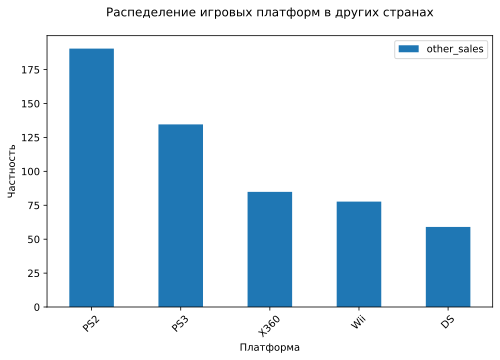

In [59]:
# посмотрим cамые популярные платформы (топ-5) для other_sales
(   df
    .pivot_table(index='platform', values='other_sales', aggfunc='sum')
    .sort_values(by='other_sales', ascending=False)
    .head()
    .plot(kind='bar', rot=45)
)

plt.title('Распеделение игровых платформ в других странах'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Частность')

plt.show()


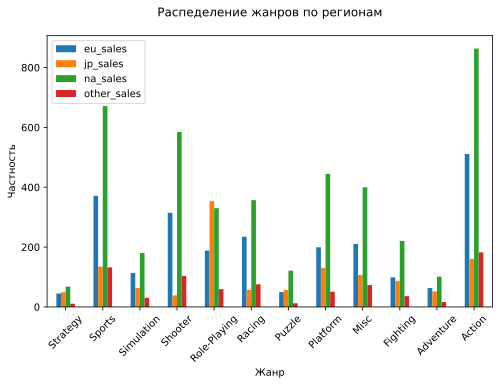

In [60]:
# построим столбчатую диаграмму распределения жанров по регионам
(
     df
    .pivot_table(cols, ['genre'], aggfunc='sum')
    .sort_values(by='genre', ascending=False)
    .plot(kind='bar', rot=45)
)
plt.title('Распеделение жанров по регионам'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Частность')

plt.show()

In [61]:
# посмотрим cамые популярные жанры (топ-5) для na_sales
(   df
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
    .head()
)


,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


In [62]:
# посмотрим cамые популярные жанры (топ-5) для eu_sales
(   df
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
    .head()
)


,genre,eu_sales
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


In [63]:
# посмотрим cамые популярные жанры (топ-5) для jp_sales
(   df
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
    .head()
)


,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


In [64]:
# посмотрим cамые популярные жанры (топ-5) для other_sales
(   df
    .pivot_table(index='genre', values='other_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='other_sales', ascending=False)
    .head()
)


,genre,other_sales
0,Action,182.22
10,Sports,132.21
8,Shooter,103.33
6,Racing,75.51
3,Misc,73.10


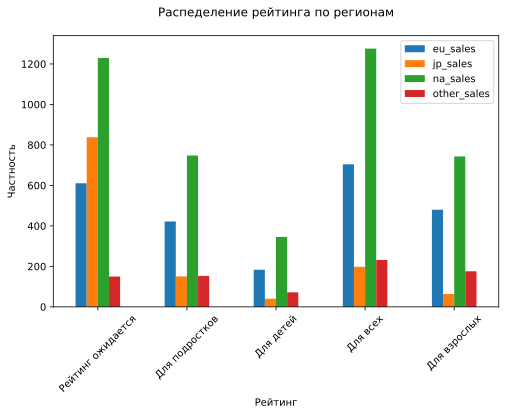

In [65]:
# распределение рейтинга по регионам
(   df
    .pivot_table(cols, ['rating_group'], aggfunc='sum')
    .sort_values(by='rating_group', ascending=False)
    .plot(kind='bar', rot=45)
)
plt.title('Распеделение рейтинга по регионам'+ "\n")
plt.xlabel('Рейтинг')
plt.ylabel('Частность')

plt.show()

In [66]:
# таблица распределения рейтинга по регионам
df.pivot_table(index='rating_group', values=cols, aggfunc='sum').fillna(0)

,eu_sales,jp_sales,na_sales,other_sales
rating_group,,,,
Для взрослых,480.00,63.58,742.89,176.06
Для всех,703.98,197.96,1275.77,231.65
Для детей,183.35,40.20,345.50,71.93
Для подростков,421.79,150.70,747.60,152.99
Рейтинг ожидается,610.56,838.20,1229.66,150.00


**Вывод:** предпочтения игроков по разным регионам и странам распределяются в следующем порядке:
- в Европе лидируют платформы PS2, PS3, X360, Wii, PS, популярные жанры экшн, спорт и шутер 
самый распространенный рейтинг «E» («Everyone») — «Для всех» и игры с неопределенным рейтингом.
- в Северной Америке лидируют платформы X360, PS2, Wii, PS3, DS, популярные жанры экшн, спорт и шутер 
самый распространенный рейтинг «E» («Everyone») — «Для всех» и игры с неопределенным рейтингом.
- в Японии лидируют платформы DS, PS, PS2, SNES, 3DS, популярные жанры ролевые игры, экшн и спорт
самый распространенный рейтинг «E» («Everyone») — «Для всех» и игры с неопределенным рейтингом.
- по продажам в других странах  лидируют платформы PS2, PS3, X360, Wii, DS, популярные жанры Action, Sports, Shooter, Racing, 
Misc, самый распространенный рейтинг «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых».

Также много игр рейтинг которых еще неопределен.

## Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры)
и Sports (англ. «спортивные соревнования») разные.

In [67]:
# отсортируем платформы в отдельную таблицу
platform_score = actual_year.query('platform in ["XOne", "PC"]').fillna(0)

platform_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
0,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,0.0,0.0,unknown,Рейтинг ожидается,1.19
3,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,Для взрослых,1.17
5,Sunset Overdrive,XOne,2014,Shooter,0.63,0.40,0.0,0.10,81.0,7.7,M,Для взрослых,1.13
22,Dragon Age: Inquisition,XOne,2014,Role-Playing,0.56,0.28,0.0,0.09,85.0,6.9,M,Для взрослых,0.93
28,Just Cause 3,XOne,2015,Action,0.44,0.39,0.0,0.08,71.0,7.0,M,Для взрослых,0.91


In [68]:
# произведм расчет среднего пользовательсткого рейтинга на каждую платформу
mean_user_score = platform_score.pivot_table(index='platform', values='user_score').reset_index()
mean_user_score.columns = ['platform', 'mean_user_score']
mean_user_score.head()

,platform,mean_user_score
0,PC,5.007368
1,XOne,4.196296


### Прверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые**.
Проверка гипотез начинается с формулировки нулевой гипотезы H₀ (от англ. hypothesis — «гипотеза»). 
Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀.

Н0 — cредние пользовательские рейтинги платформ Xbox One и PC равны, т.е. средние значения равны.

Н1 — cредние пользовательские рейтинги платформ Xbox One и PC не равны, т.е. средние значения не равны.

Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.

Для проверки гипотезы будет использоваться критерий p-value. Метод scipy.stats.ttest_1samp() возвращает два числа:
статистику разности и уровень значимости для этой статистики — p-value (от англ. p, probability — «вероятность», 
value — «значение»).

In [69]:
# проверка гипотезы
sample_1 = platform_score[platform_score['platform'] == 'XOne']['user_score'] 
sample_2 = platform_score[platform_score['platform'] == 'PC']['user_score']

results = st.ttest_ind( sample_1, sample_2)
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.07128959304783493
Не получилось отвергнуть нулевую гипотезу


P-значение достаточно мало, что даёт основание отвергнуть предположение об отсутствии различий между пользовательским 
рейтингом на разных игровых площадках, т.е. маловероятна случайность результатов теста гипотезы.

### Прверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 — средние пользовательские рейтинги жанров Action и Sports равны, т.е. средние значения равны.

Н1 — средние пользовательские рейтинги жанров Action и Sports не равны, т.е. средние значения не равны.

Для проверки гипотезы будет использоваться критерий p-value.

In [70]:
# отсортируем жанры в отдельную таблицу
genre_score = actual_year.query('genre in ["Action", "Sports"]').fillna(0)

genre_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_group,total_sales
2,Mad Max (2015),PS4,2015,Action,0.36,0.59,0.04,0.18,0.0,0.0,unknown,Рейтинг ожидается,1.17
3,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,Для взрослых,1.17
4,WWE 2K15,PS4,2014,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T,Для подростков,1.15
7,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73.0,7.6,E,Для всех,1.11
10,Disney Infinity 2.0: Marvel Super Heroes,X360,2014,Action,0.64,0.34,0.00,0.10,0.0,0.0,unknown,Рейтинг ожидается,1.08


In [71]:
# произведм расчет среднего пользовательсткого рейтинга на каждый жанр
mean_genre = genre_score.pivot_table(index='genre', values='user_score').reset_index()
mean_genre.columns = ['genre', 'mean_user_score']
mean_genre.head()

,genre,mean_user_score
0,Action,3.054878
1,Sports,3.860870


In [72]:
# проверка гипотезы
sample_1 = genre_score[genre_score['genre'] == 'Action']['user_score'] 
sample_2 = genre_score[genre_score['genre'] == 'Sports']['user_score']

results = st.ttest_ind( sample_1, sample_2)
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.038753604998570744
Принимаем альтернативную гипотезу


## Общий вывод

<div style="border:solid green 2px; padding: 20px">
Проанализировав данные о продаже компьютерных игр по всему миру, удалось выяснить, что предпочтения игроков меняются 
в зависимости от региона:
- в Европе лидируют платформы PS2, PS3, X360, Wii, PS, популярные жанры экшн, спорт и шутер 
самый распространенный рейтинг «E» («Everyone») — «Для всех» и игры с неопределенным рейтингом.
- в Северной Америке лидируют платформы X360, PS2, Wii, PS3, DS, популярные жанры экшн, спорт и шутер 
самый распространенный рейтинг «E» («Everyone») — «Для всех» и игры с неопределенным рейтингом.
- в Японии лидируют платформы DS, PS, PS2, SNES, 3DS, популярные жанры ролевые игры, экшн и спорт
самый распространенный рейтинг «E» («Everyone») — «Для всех» и игры с неопределенным рейтингом.
- по продажам в других странах  лидируют платформы PS2, PS3, X360, Wii, DS, популярные жанры Action, Sports, Shooter, Racing, 
Misc, самый распространенный рейтинг «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых».

По количеству проданных игр лидирует Северная Америка, затем идет Европа.    
    
Самыми популярными платформами по всем регионам являются PS2, PS3, X360, DS.
Самыми популярными жанрами являются экшн, спорт и шутер.
Самый распространенный рейтинг «E» («Everyone») — «Для всех», а также игры рейтинг которых еще неопределен.
       
В топ позиции находится игра с названием Need for Speed: Most Wanted, платформа PS2, жанр Action, 
рейтинг «E» («Everyone») — «Для всех».  
</div>     